# Make Calibration WAV Files
## By Terry Bondy, VA3TYB

In [14]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
# format long

Last updated: Tuesday 31 December 2019 UTC

In [15]:
sampleRate = 16000;
numPeriods = 15;
period = numPeriods;
Tshort = 0:1/sampleRate:1;
T = 0:1/sampleRate:period;

In [16]:
TestFreq = 721;
TestPhi = [ 0 ];
cosArg = 2*pi*TestFreq * Tshort + TestPhi;
Pilot = cos(cosArg);

In [17]:
Pilot = [(Pilot(1:end-1)' * ones(1, numPeriods))(:)', Pilot(1)];

In [18]:
RC = (1 - cos(2*pi*T/period))/2;

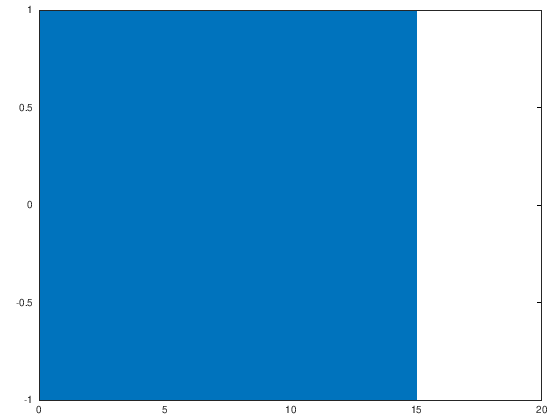

In [19]:
plot(T, Pilot)

In [20]:
for iter = 1:1:150
  printf("iter: %d\n", iter);
  Sigfilename = sprintf("Sig_%d.mat", iter);
  if (2 != exist (Sigfilename, "file"))
    break
  else
    load(Sigfilename)
    calibrateFilename = sprintf("calibrateNew_%d.wav", iter)
  endif
  
  max(abs(Sig))
  iter++;
endfor

iter: 1
calibrateFilename = calibrateNew_1.wav
ans =  5.0877
iter: 2
calibrateFilename = calibrateNew_2.wav
ans =  8.4277
iter: 3
calibrateFilename = calibrateNew_3.wav
ans =  10.994
iter: 4
calibrateFilename = calibrateNew_4.wav
ans =  12.808
iter: 5
calibrateFilename = calibrateNew_5.wav
ans =  14.850
iter: 6
calibrateFilename = calibrateNew_6.wav
ans =  16.778
iter: 7
calibrateFilename = calibrateNew_7.wav
ans =  19.419
iter: 8
calibrateFilename = calibrateNew_8.wav
ans =  20.937
iter: 9
calibrateFilename = calibrateNew_9.wav
ans =  22.375
iter: 10
calibrateFilename = calibrateNew_10.wav
ans =  23.670
iter: 11
calibrateFilename = calibrateNew_11.wav
ans =  24.814
iter: 12
calibrateFilename = calibrateNew_12.wav
ans =  26.770
iter: 13
calibrateFilename = calibrateNew_13.wav
ans =  27.543
iter: 14
calibrateFilename = calibrateNew_14.wav
ans =  29.035
iter: 15
calibrateFilename = calibrateNew_15.wav
ans =  30.518
iter: 16
calibrateFilename = calibrateNew_16.wav
ans =  31.677
iter: 17
c

In [21]:
# Repeat Sig to expand it to numPeriods
Sig = [(Sig(1:end-1)' * ones(1, numPeriods))(:)', Sig(1)];

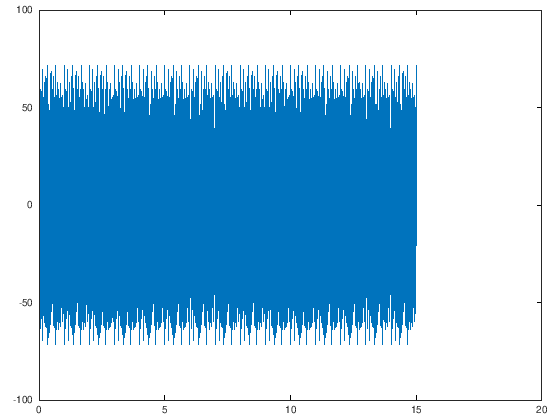

In [22]:
plot(T, Sig)

In [23]:
calibrateFilename
audiowrite(calibrateFilename, [[Pilot .* RC](1:end-1), [Sig .* RC ./ max(abs(Sig))](1:end-1), Pilot .* RC], sampleRate, 
"Title", "Calibration file for Yaesu radioes.",
"Artist", "Terry Bondy, VA3TYB")

calibrateFilename = calibrateNew_60.wav


In [24]:
audioinfo(calibrateFilename)

ans =

  scalar structure containing the fields:

    Filename = calibrateNew_60.wav
    CompressionMethod = 
    NumChannels =  1
    SampleRate =  16000
    TotalSamples =  720001
    Duration =  45.000
    BitsPerSample =  16
    BitRate = -1
    Title = Calibration file for Yaesu radioes.
    Artist = Terry Bondy, VA3TYB
    Comment = 



In [25]:
[y, fs] = audioread(calibrateFilename);
size(y)

ans =

   720001        1



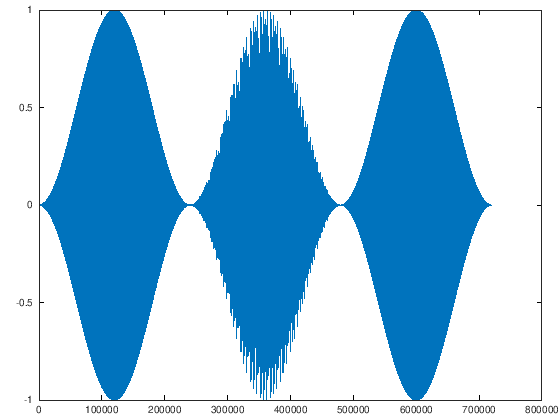

In [26]:
plot(y)